In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/raw/transactions.csv')

# Parse timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (106458, 12)

First few rows:


,transaction_id,user_id,timestamp,amount,receiver,device_id,location,device_changed,location_changed,is_fraud,fraud_pattern,pattern
0,48120677-68ee-4019-8227-948e4ba761f1,user_000522,2025-07-27 00:33:11.523179,10335.529818,mule_account_8829,device_160,Port Matthewside,True,True,True,sim_swap,sim_swap
1,04d27c7f-cf56-4a5d-a9a0-dc8364e38e8e,user_000522,2025-07-27 00:35:11.523179,45984.111927,mule_account_1231,device_744,Austinside,True,True,True,sim_swap,sim_swap
2,3236fe3f-7300-4756-8ccd-989b1349ebce,user_000522,2025-07-27 00:39:11.523179,35772.213646,mule_account_4793,device_760,Lauramouth,True,True,True,sim_swap,sim_swap
3,6a52c9f8-4826-4ea2-a089-07efd7d74bde,user_000522,2025-07-27 00:43:11.523179,39516.512390,mule_account_5383,device_594,New Williamburgh,True,True,True,sim_swap,sim_swap
4,9002ebb6-f515-4f58-89b1-2427e99eb718,user_000522,2025-07-27 00:45:11.523179,18886.532183,mule_account_6956,device_592,Brandtstad,True,True,True,sim_swap,sim_swap


Fraud Distribution:
is_fraud
False    94000
True     12458
Name: count, dtype: int64

Fraud rate: 11.70%


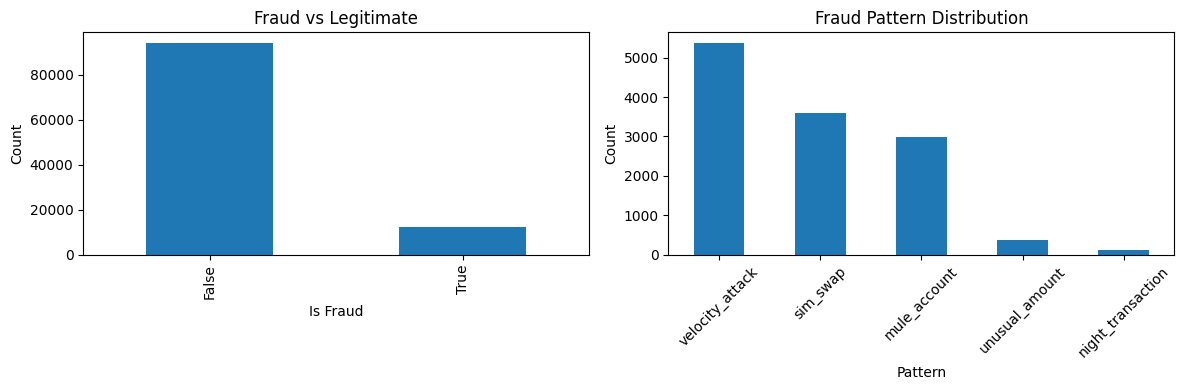

In [2]:
# Fraud distribution
print("Fraud Distribution:")
print(df['is_fraud'].value_counts())
print(f"\nFraud rate: {df['is_fraud'].mean():.2%}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Fraud vs Legitimate
df['is_fraud'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Fraud vs Legitimate')
axes[0].set_xlabel('Is Fraud')
axes[0].set_ylabel('Count')

# Fraud patterns
df[df['is_fraud']]['fraud_pattern'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Fraud Pattern Distribution')
axes[1].set_xlabel('Pattern')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

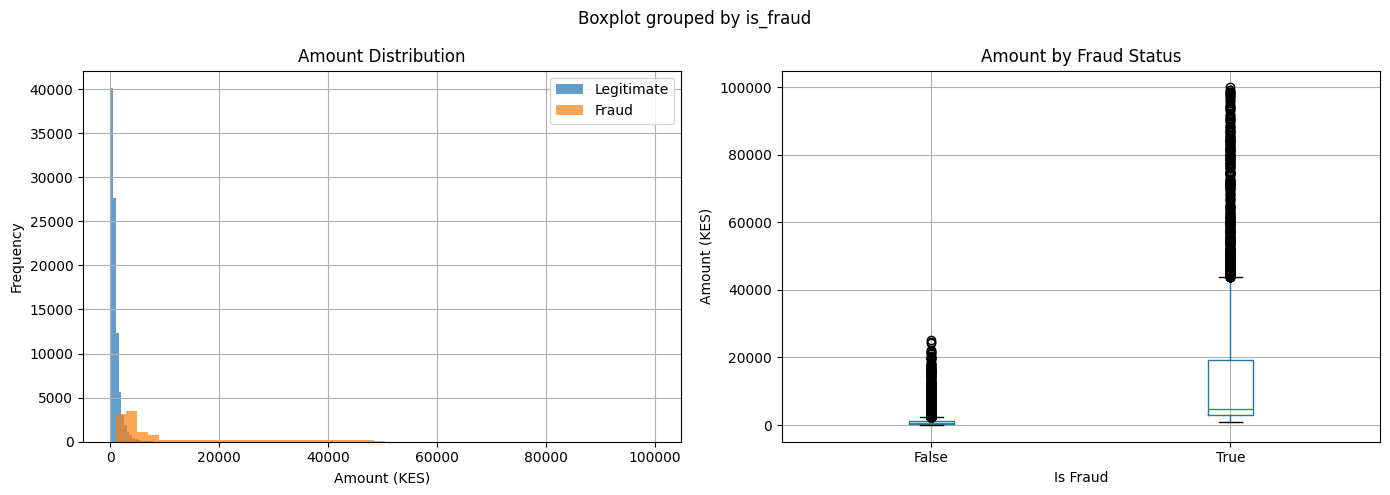

In [3]:
# Amount distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Amount distribution by fraud status
df[~df['is_fraud']]['amount'].hist(bins=50, ax=axes[0], alpha=0.7, label='Legitimate')
df[df['is_fraud']]['amount'].hist(bins=50, ax=axes[0], alpha=0.7, label='Fraud')
axes[0].set_title('Amount Distribution')
axes[0].set_xlabel('Amount (KES)')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Box plot
df.boxplot(column='amount', by='is_fraud', ax=axes[1])
axes[1].set_title('Amount by Fraud Status')
axes[1].set_xlabel('Is Fraud')
axes[1].set_ylabel('Amount (KES)')

plt.tight_layout()
plt.show()

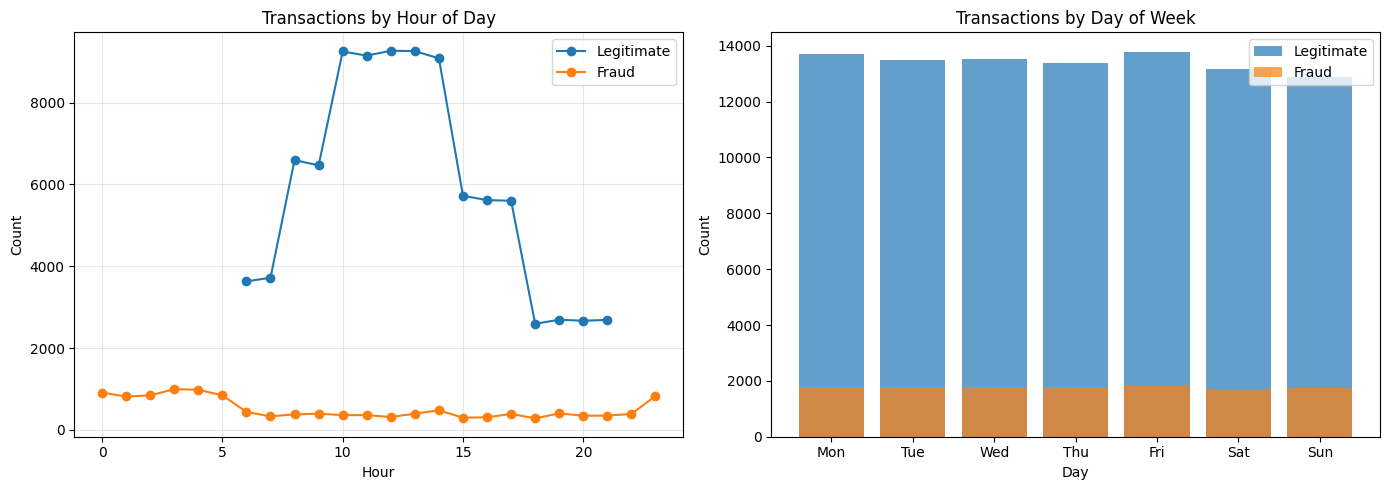

In [4]:
# Time patterns
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Transactions by hour
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

legitimate_hours = df[~df['is_fraud']]['hour'].value_counts().sort_index()
fraud_hours = df[df['is_fraud']]['hour'].value_counts().sort_index()

axes[0].plot(legitimate_hours.index, legitimate_hours.values, label='Legitimate', marker='o')
axes[0].plot(fraud_hours.index, fraud_hours.values, label='Fraud', marker='o')
axes[0].set_title('Transactions by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Count')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Day of week
legitimate_days = df[~df['is_fraud']]['day_of_week'].value_counts().sort_index()
fraud_days = df[df['is_fraud']]['day_of_week'].value_counts().sort_index()

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1].bar(days, legitimate_days.values, alpha=0.7, label='Legitimate')
axes[1].bar(days, fraud_days.values, alpha=0.7, label='Fraud')
axes[1].set_title('Transactions by Day of Week')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Count')
axes[1].legend()

plt.tight_layout()
plt.show()

In [5]:
# Sample fraud transactions
print("Sample Fraud Transactions:")
print("="*80)
sample_fraud = df[df['is_fraud']].head(5)
for idx, row in sample_fraud.iterrows():
    print(f"\nPattern: {row['fraud_pattern']}")
    print(f"Amount: {row['amount']:.2f} KES")
    print(f"Time: {row['timestamp']}")
    print(f"Device changed: {row['device_changed']}")
    print(f"Location changed: {row['location_changed']}")
    print("-"*80)

Sample Fraud Transactions:

Pattern: sim_swap
Amount: 10335.53 KES
Time: 2025-07-27 00:33:11.523179
Device changed: True
Location changed: True
--------------------------------------------------------------------------------

Pattern: sim_swap
Amount: 45984.11 KES
Time: 2025-07-27 00:35:11.523179
Device changed: True
Location changed: True
--------------------------------------------------------------------------------

Pattern: sim_swap
Amount: 35772.21 KES
Time: 2025-07-27 00:39:11.523179
Device changed: True
Location changed: True
--------------------------------------------------------------------------------

Pattern: sim_swap
Amount: 39516.51 KES
Time: 2025-07-27 00:43:11.523179
Device changed: True
Location changed: True
--------------------------------------------------------------------------------

Pattern: sim_swap
Amount: 18886.53 KES
Time: 2025-07-27 00:45:11.523179
Device changed: True
Location changed: True
----------------------------------------------------------------

In [6]:
# 1. Fraud pattern breakdown
print("Fraud Pattern Distribution:")
print(df[df['is_fraud']]['fraud_pattern'].value_counts())
print(f"\nTotal fraud patterns: {df[df['is_fraud']]['fraud_pattern'].value_counts().sum()}")

# 2. Device/Location changes by fraud status
print("\n" + "="*80)
print("Device Changes:")
print(df.groupby('is_fraud')['device_changed'].value_counts(normalize=True))

print("\nLocation Changes:")
print(df.groupby('is_fraud')['location_changed'].value_counts(normalize=True))

# 3. Amount statistics
print("\n" + "="*80)
print("Amount Statistics by Fraud Status:")
print(df.groupby('is_fraud')['amount'].describe())

# 4. Velocity check (transactions per user)
print("\n" + "="*80)
print("Transactions per User:")
user_txn_counts = df.groupby(['user_id', 'is_fraud']).size().reset_index(name='count')
print("\nLegitimate users:")
print(user_txn_counts[~user_txn_counts['is_fraud']]['count'].describe())
print("\nFraud users:")
print(user_txn_counts[user_txn_counts['is_fraud']]['count'].describe())

Fraud Pattern Distribution:
fraud_pattern
velocity_attack      5370
sim_swap             3604
mule_account         2984
unusual_amount        385
night_transaction     115
Name: count, dtype: int64

Total fraud patterns: 12458

Device Changes:
is_fraud  device_changed
False     False             1.000000
True      False             0.691363
          True              0.308637
Name: proportion, dtype: float64

Location Changes:
is_fraud  location_changed
False     False               1.000000
True      False               0.694253
          True                0.305747
Name: proportion, dtype: float64

Amount Statistics by Fraud Status:
            count          mean           std          min          25%  \
is_fraud                                                                  
False     94000.0    928.082959   1010.635128    50.000000   364.345000   
True      12458.0  13159.163803  16384.756353  1000.161616  2990.916798   

                  50%           75%           max  
is